In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
titanic_train=pd.read_csv('train.csv')
titanic_test=pd.read_csv('test.csv')

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic_train.shape

(891, 12)

In [6]:
titanic_test.shape

(418, 11)

In [7]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

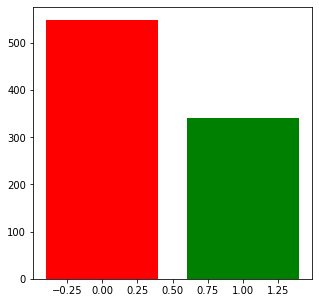

In [8]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Survived'].value_counts().keys()),list(titanic_train['Survived'].value_counts()),color=['r','g'])
plt.show()

In [9]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

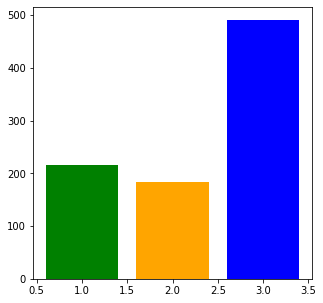

In [10]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Pclass'].value_counts().keys()),list(titanic_train['Pclass'].value_counts()),color=['blue','green','orange'])
plt.show()

In [11]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

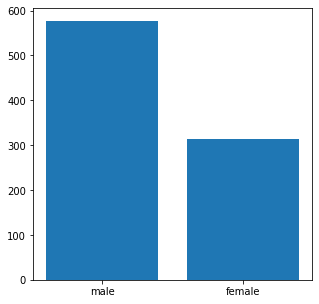

In [12]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Sex'].value_counts().keys()),list(titanic_train['Sex'].value_counts()))
plt.show()

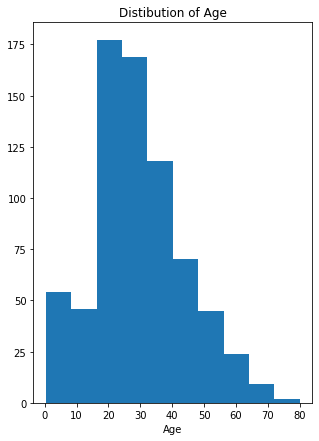

In [13]:
plt.figure(figsize=(5,7))
plt.hist(titanic_train['Age'])
plt.title("Distibution of Age")
plt.xlabel("Age")
plt.show()

In [14]:
titanic_train['Survived'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Survived, Length: 891, dtype: bool

In [15]:
sum(titanic_train['Survived'].isnull())

0

In [16]:
titanic_train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [17]:
sum(titanic_train['Age'].isnull())

177

In [18]:
#used to delete all the null values
titanic_train=titanic_train.dropna()

In [19]:
sum(titanic_train['Age'].isnull())

0

In [20]:
x_train=titanic_train[['Age']]
y_train=titanic_train[['Survived']]

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtc = DecisionTreeClassifier()

In [28]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
#predicting values
sum(titanic_test['Age'].isnull())

86

In [32]:
titanic_test=titanic_test.dropna()

In [36]:
sum(titanic_test['Age'].isnull())

0

In [33]:
x_test=titanic_test[['Age']]

In [34]:
y_pred=dtc.predict(x_test)

In [35]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [41]:
submission={'PassengerId':titanic_test.PassengerId,'Survived':y_pred}

In [38]:
submission

{'PassengerId':      PassengerId  Pclass                                               Name  \
 12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
 14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
 24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
 26           918       1                       Ostby, Miss. Helene Ragnhild   
 28           920       1                            Brady, Mr. John Bertram   
 ..           ...     ...                                                ...   
 404         1296       1                       Frauenthal, Mr. Isaac Gerald   
 405         1297       2       Nourney, Mr. Alfred (Baron von Drachstedt")"   
 407         1299       1                         Widener, Mr. George Dunton   
 411         1303       1    Minahan, Mrs. William Edward (Lillian E Thorpe)   
 414         1306       1                       Oliva y Ocana, Dona. Fermina   
 
         Sex   Age  Sib

In [49]:
submission2=pd.DataFrame(data=submission)

In [43]:
submission2

,PassengerId,Survived
12,904,1
14,906,0
24,916,1
26,918,1
28,920,1
...,...,...
404,1296,1
405,1297,0
407,1299,0
411,1303,0


In [44]:
submission2.to_csv('submission.csv',index=False)